# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가을 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

In [ ]:
#from_tensor_slices는 메모리에 있는 로우 데이터를 데이터셋으로 읽어옴

2. **제공 데이터 전처리**
    - **map(함수)**: 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - **filter(함수)**: 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.

3. **Dataset을 사용해 데이터 제공**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정 (=feeding_size지정))
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
          #default : False 제공하지 않는다
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int(데이터 갯수). buffer 크기(공간 크기)는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
        - 한 에폭이 끝나면 섞음(메모리에 끌고와서 섞음)= 에폭단위로 섞음
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.
              지정된 배치만큼 개수 데이터를 가져옴 보통 fit에서 진행됨 
              만약 개인적으로 데이터 파이프라인으로부터 확인해보고 싶을 때 이용

In [1]:
import tensorflow as tf
import numpy as np

##### Tensor
- TensorFlow의 기본 data type. 
- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.

In [2]:
#nd.array와 사용 비슷
#constant는 tensorflow용 numpy배열이라고 생각하면 됨.
t = tf.constant([1,2,3], dtype="float32")
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [3]:
# tensor=>numpy 변환
a = t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [4]:
# numpy/list => tensor 변환
t2 = tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
# numpy/list => tensor 변환
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [6]:
raw_data1 = np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
#메모리에 자료가 있을 경우 
#ndarray/list같이 메모리에 있는 자료 구조로부터 Dataset 생성
# - from_tensor_slices()

#늦은 실행
#실제 모델을 읽어서 어떻게 하겠다고 설정만 해둠
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [9]:
# Dataset : iterator => for 문을 이용해서 값 조회
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### x, y 묶어서 제공

In [10]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [11]:
print(raw_data1)
print(raw_data2)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]


In [15]:
#두개이상의 데이터셋을 묶어서 제공할 경우 튜플로 묶어줌.
#Dataset이 데이터를 제공할 때 같은 index의 데이터들을 묶어서 제공. zip함수와 비슷
dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2)) #(x(feature를 가짐),y(label을 가짐))라고 생각하면 됨
for X, y in dataset2:
    print(X, y, sep='-----------')

tf.Tensor(0, shape=(), dtype=int32)-----------tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)-----------tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)-----------tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)-----------tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)-----------tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)-----------tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)-----------tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)-----------tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)-----------tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)-----------tf.Tensor(19, shape=(), dtype=int32)


In [16]:
#take(개수0: Dataset에서 지정한 개수만큼의 데이터 조회)
dataset3 = dataset.take(3)
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [18]:
d= dataset2.take(2)
for X, y in d:
    print(X, y, sep='---')

tf.Tensor(0, shape=(), dtype=int32)---tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)---tf.Tensor(11, shape=(), dtype=int32)


##### shuffle

In [19]:
#shuffle(buffer_size):데이터를 제공하기 전에 섞는다
#단 실질적으로 여기서 섞는게 아님
#row데이터를 어떻게 할건지 pipeline을 만들어둔거라고 생각하면 됨
dataset4 = dataset.shuffle(10) 
print(type(dataset4))
#아래와 같이 데이터를 사용하는 시점에서 실질적으로 섞인다고 보면 됨
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


##### batch
- 한번에 데이터를 n개씩 제공하겠다는 것
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.

In [20]:
#batch(size): 한 번에 size만큼 데이터 제공
dataset5 = dataset.batch(3)#, drop_remainder = True)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [21]:
#batch(size): 한 번에 size만큼 데이터 제공
dataset5 = dataset.batch(3, drop_remainder = True) #마지막 남은 것이 배치사이즈보다 적을경우 버림
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


In [22]:
dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([6 9 3], shape=(3,), dtype=int32)
tf.Tensor([5 4 8], shape=(3,), dtype=int32)
tf.Tensor([2 0 7], shape=(3,), dtype=int32)
tf.Tensor([1], shape=(1,), dtype=int32)


##### repeat

In [23]:
#repeat(반복횟수):데이터를 반복횟수 만큼 반복해서 제공. 
#반복횟수 생략시 무한제공!!!
dataset7 = dataset.repeat(3) 
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
t

In [24]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([3 5 6 4 7], shape=(5,), dtype=int32)
tf.Tensor([9 2 8 1 0], shape=(5,), dtype=int32)
tf.Tensor([7 4 6 9 8], shape=(5,), dtype=int32)
tf.Tensor([2 3 0 1 5], shape=(5,), dtype=int32)
tf.Tensor([9 1 2 8 7], shape=(5,), dtype=int32)
tf.Tensor([5 3 0 4 6], shape=(5,), dtype=int32)


In [25]:
#동일한 인덱스에 있는 것들끼리
#[0,2,1,7,5] -- [10,12,11,17,15]

#데이터를 섞는 것이 아니고 인덱스를 섞는것임
d = dataset2.shuffle(10).batch(5).repeat(3)
for x,y in d:
    print(x,y, sep='---')

tf.Tensor([0 2 1 7 5], shape=(5,), dtype=int32)---tf.Tensor([10 12 11 17 15], shape=(5,), dtype=int32)
tf.Tensor([4 3 9 8 6], shape=(5,), dtype=int32)---tf.Tensor([14 13 19 18 16], shape=(5,), dtype=int32)
tf.Tensor([6 8 1 4 7], shape=(5,), dtype=int32)---tf.Tensor([16 18 11 14 17], shape=(5,), dtype=int32)
tf.Tensor([3 2 5 9 0], shape=(5,), dtype=int32)---tf.Tensor([13 12 15 19 10], shape=(5,), dtype=int32)
tf.Tensor([9 8 0 4 6], shape=(5,), dtype=int32)---tf.Tensor([19 18 10 14 16], shape=(5,), dtype=int32)
tf.Tensor([5 2 1 3 7], shape=(5,), dtype=int32)---tf.Tensor([15 12 11 13 17], shape=(5,), dtype=int32)


##### map

In [28]:
#매개변수 : 원소를 받을 변수
#리턴 : 변환된 값
def mapping_func(x):
    return x**2
#mapping_func(2)이렇게 넣으면 안됨 함수 자체로 넣어야 함
dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [31]:
def mapping_func2(x, y):
    return x**3, y

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
dataset10 = dataset2.map(mapping_func2)
for X, y in dataset10:
    print(X, y, sep='---')

tf.Tensor(0, shape=(), dtype=int32)---tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)---tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)---tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(27, shape=(), dtype=int32)---tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)---tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(125, shape=(), dtype=int32)---tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(216, shape=(), dtype=int32)---tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(343, shape=(), dtype=int32)---tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(512, shape=(), dtype=int32)---tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(729, shape=(), dtype=int32)---tf.Tensor(19, shape=(), dtype=int32)


In [32]:
dataset11 = dataset.map(lambda x: x**2)
for data in dataset11:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [34]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


##### filter

In [36]:
#filter: 특정조건을 만족하는 원소만 제공
#매개변수: 원소 받을 변수
#리턴: bool -> true인 원소만 제공

def filter_func(x):
    return x%2 == 0 

#함수로 넣음
dataset13 = dataset.filter(filter_func)
print(type(dataset13))

for data in dataset13:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [37]:
dataset14 = dataset.filter(lambda x : x > 5)
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### 종합

In [50]:
raw_data = np.arange(-10,11)
#from_tensor_slices(raw_data): #row 데이터 연결
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                               .filter(lambda x:x>=0)\
                               .map(lambda x:x+10)\
                               .shuffle(raw_data.size)\
                               .batch(3)

In [51]:
for data in dataset_final:
    print(data)

tf.Tensor([14 19 12], shape=(3,), dtype=int32)
tf.Tensor([17 18 10], shape=(3,), dtype=int32)
tf.Tensor([11 13 15], shape=(3,), dtype=int32)
tf.Tensor([16 20], shape=(2,), dtype=int32)


# 문제 유형별 MLP 네트워크
- Multi Layer Perceptron
    - Fully Connected Layer로 구성된 네트워크

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [52]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, models

In [54]:
#random seed값 설정
#sklearn 에서는 random_state가 있었는데 tf는 이런게 없음
#tf는 random성을 어느정도 유지하고 싶다면(완벽하게는 안됨) 난수고정

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩

In [55]:
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


In [56]:
train_X[:5]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [57]:
train_y[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

##### 하이퍼파라미터, 변수 정의

In [58]:
LEARNING_RATE = 0.001 #optimizer에 설정할 학습률 디폴트 0.001
N_EPOCHS  = 200 #데이터셋을 몇번 학습시킬지 횟수 지정. 200번 학습하겠다
N_BATCHS = 32 # 배치사이즈 - 최적화 데이터 단위
# train/test set의 개수
N_TRAIN = train_X.shape[0]  
N_TEST = test_X.shape[0]  

##### X, y 전처리
- MLP는 선형기반 모델이므로 Feature scaling을 해준다.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

In [60]:
#학습 데이터셋 - batch에서 drop_remainder=True로 설정 -> 학습의 일관성을 위해.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

##### 모델 구현

In [61]:
X_train.shape

(404, 13)

In [74]:
#모델 생성 함수
def create_housing_model():
    
    #모델객체 생성
    model = keras.Sequential()
    #모델객체에 layer 추가
    #hidden layer => feature extractor
    #model.add(layer.InputLayer((13,))) #어떤 형태의 레이어를 넣을 것이다
    #실질적으로 inputlayer는 일하는 layer가 아님
    
    #input layer는 입력 데이터의 shape만 정의하면 되므로 
    #첫번째 layer의 input_shape 매개변수에 shape를 지정하는것으로 대체할 수 있음.
    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,))) 
                                                         #튜플로 지정해야하기 때문에 반드시 쉼표가 붙어야 함
    model.add(layers.Dense(units=64, activation='relu', name='hidden2'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    #출력 layer
    #회귀 (regression):unit개수 = 1(집값 예측값)
    #activation 함수:None
    #좌표처럼 위도 경도 값을 예측해야 한다면 2 지정 반드시 1은 아님.
    model.add(layers.Dense(units=1, name='output')) ##name: 레이어의 이름 설정 
    return model

In [75]:
model = create_housing_model()
#optimizer='adam'이러면 디폴트로 함.
#내가 원하는 옵션을 지정하기 위해선 다음과 같이 지정함

#회귀에서 loss함수:: mse(Mean Squared Error)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='mse')

In [76]:
model.summary() #모델의 구조 확인

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


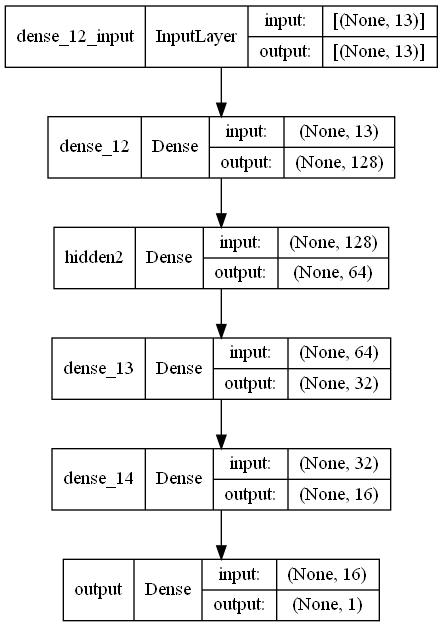

In [78]:
keras.utils.plot_model(model, show_shapes=True)

##### 학습(Train)

In [79]:
#tf.data.Dataset으로 train데이터 주입시 validation_split을 사용할 수 없음.(비율로 나누기)
#검증 데이터셋도 DataSet으로 만든 뒤 validation_data 매개변수에 전달함.
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=test_dataset)

Epoch 1/200
12/12 [==============================] - 0s 7ms/step - loss: 575.2844 - val_loss: 586.5577
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 527.5981 - val_loss: 507.0150
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 405.4196 - val_loss: 319.4933
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 195.2351 - val_loss: 98.3594
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 80.0978 - val_loss: 71.2162
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 46.3939 - val_loss: 45.0953
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 31.8160 - val_loss: 32.7105
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 24.9729 - val_loss: 28.2421
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 20.8909 - val_loss: 26.0423
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 17.6036 - 

Epoch 82/200
12/12 [==============================] - 0s 2ms/step - loss: 5.2441 - val_loss: 16.7219
Epoch 83/200
12/12 [==============================] - 0s 2ms/step - loss: 5.1515 - val_loss: 15.9930
Epoch 84/200
12/12 [==============================] - 0s 2ms/step - loss: 5.1775 - val_loss: 16.1217
Epoch 85/200
12/12 [==============================] - 0s 2ms/step - loss: 4.9703 - val_loss: 15.5644
Epoch 86/200
12/12 [==============================] - 0s 2ms/step - loss: 4.8387 - val_loss: 16.7852
Epoch 87/200
12/12 [==============================] - 0s 2ms/step - loss: 4.7601 - val_loss: 15.5432
Epoch 88/200
12/12 [==============================] - 0s 2ms/step - loss: 4.7410 - val_loss: 16.2696
Epoch 89/200
12/12 [==============================] - 0s 2ms/step - loss: 4.7025 - val_loss: 15.5773
Epoch 90/200
12/12 [==============================] - 0s 2ms/step - loss: 4.5550 - val_loss: 14.8206
Epoch 91/200
12/12 [==============================] - 0s 2ms/step - loss: 4.4622 - val_loss

12/12 [==============================] - 0s 2ms/step - loss: 2.2887 - val_loss: 11.3453
Epoch 163/200
12/12 [==============================] - 0s 2ms/step - loss: 2.3530 - val_loss: 11.3524
Epoch 164/200
12/12 [==============================] - 0s 2ms/step - loss: 2.2270 - val_loss: 10.5416
Epoch 165/200
12/12 [==============================] - 0s 2ms/step - loss: 2.0586 - val_loss: 10.5311
Epoch 166/200
12/12 [==============================] - 0s 2ms/step - loss: 2.1604 - val_loss: 10.7544
Epoch 167/200
12/12 [==============================] - 0s 2ms/step - loss: 2.1404 - val_loss: 10.8674
Epoch 168/200
12/12 [==============================] - 0s 2ms/step - loss: 2.1590 - val_loss: 10.9360
Epoch 169/200
12/12 [==============================] - 0s 2ms/step - loss: 2.0669 - val_loss: 10.8213
Epoch 170/200
12/12 [==============================] - 0s 2ms/step - loss: 1.9819 - val_loss: 10.6212
Epoch 171/200
12/12 [==============================] - 0s 2ms/step - loss: 1.9703 - val_loss: 10

##### 결과 시각화

In [84]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

In [80]:
import matplotlib.pyplot as plt

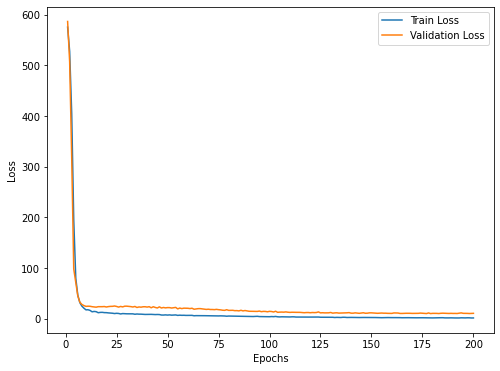

In [86]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

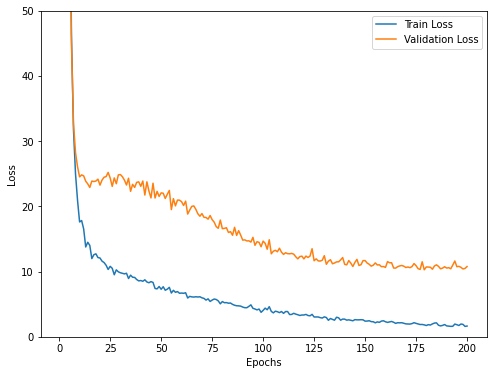

In [87]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)

plt.legend()
plt.show()

##### 최종 테스트

In [91]:
np.sqrt(10.77)
#3천300달러정도 차이남

3.281767816284388

In [88]:
loss = model.evaluate(test_dataset)
print(loss)

4/4 [==============================] - 0s 1000us/step - loss: 10.7706
10.770567893981934


##### 모델 네트워크 저장

In [92]:
model.save('models/boston_hosing_model') #저장할 디렉토리 경로

INFO:tensorflow:Assets written to: models/boston_hosing_model\assets


##### 새로운 데이터 추론

In [93]:
new_data = X_test[:5]
pred = model.predict(new_data)

In [94]:
 pred

array([[ 9.225399],
       [18.806303],
       [20.54857 ],
       [31.649189],
       [24.709616]], dtype=float32)

In [95]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [96]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [98]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [100]:
#이렇게 사용하려고 만듦
pred= 2
class_names[2]

'Pullover'

##### Data 로딩

In [101]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [102]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
#fit(train, val)
#evaluate(test)

##### validata set  생성

In [103]:
from sklearn.model_selection import train_test_split
#원칙적으로 이렇게 하는게 맞음
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [104]:
train_image.shape, val_image.shape, test_image.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

##### 이미지 확인

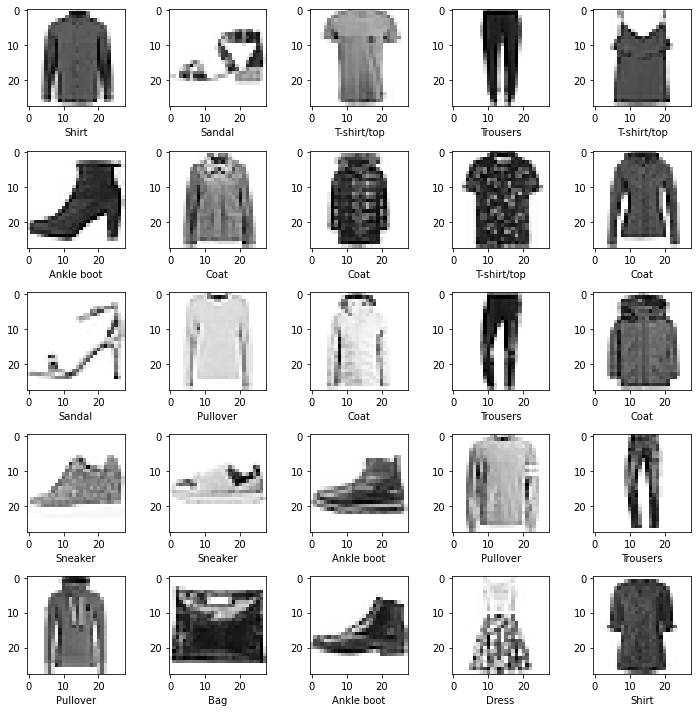

In [107]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
#    plt.xticks([])
#    plt.yticks([])
    plt.imshow(train_image[i], cmap="Greys") #cmap='gray'
    plt.xlabel(class_names[train_label[i]])

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

#train/val/test set의 데이터 개수
N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

In [108]:
#label encoding 된 형태
train_label

array([6, 5, 0, ..., 7, 4, 9], dtype=uint8)

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리

In [110]:
#label encoding된 형태
train_label.shape

(48000,)

In [112]:
#to_caltegorical : 원핫인코딩 처리
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [113]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

- x값(이미지) 처리
    - 이미지데이터 전처리: 0 ~ 1 정규화. X/255.0 => Dataset 생성에서 처리

In [114]:
#여기서 255로 나누는게 훨씬 효율적임
#X_train = train_image.astype(np.float32)/255.0
#X_val = val_image.astype(np.float32)/255.0
#X_test = test_image.astype(np.float32)/255.0

X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

##### Dataset 생성

In [115]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

In [116]:
X_train.shape

(48000, 28, 28)

##### 모델 생성 및 컴파일

In [118]:
def create_fashionmnist_model():
    #모델생성
    model = keras.Sequential()
    #hidden layer 추가
    #model.add(layers.InputLayer(28,28))
    
    #Dense Layer는 입력으로 1차원 배열을 받음.
    #입력 데이터가 1차원이 아닐 경우 1차춴으로 먼저 변환
    #Flatten Layer는 N차원의 입력을 1차원으로 변환하는 기능을 제공하는 Layer
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))

    #출력 레이어
    #다중 클래스 분류::unit개수-클래스개수, activation-sotfmax(클래스별 확률예측)
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [119]:
model = create_fashionmnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy', #다중분류 loss 함수
              metrics=['accuracy']) #loss 이외의 추가 평가지표 설정.

In [120]:
model.summary()
#none은 배치사이즈인데
#배치사이즈는 fit할때 지정하는 것이기 때문에 현재단계에서는 모르므로 None이라고 표기

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


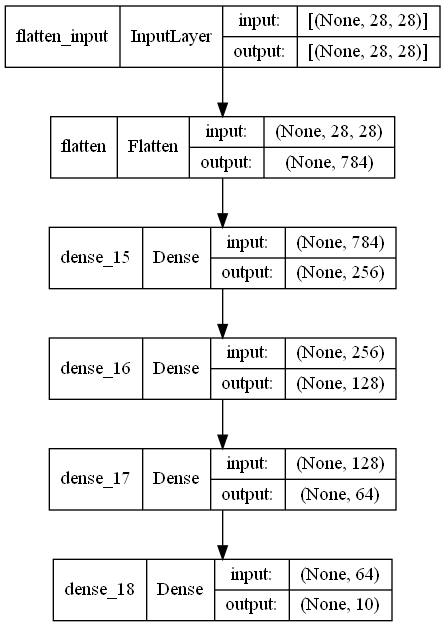

In [121]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

##### Train(학습)

In [122]:
#validationset을 제외하면 train set을 대상으로 한 검증결과만 보임
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5086 - accuracy: 0.8185 - val_loss: 0.4078 - val_accuracy: 0.8462
Epoch 2/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3748 - accuracy: 0.8632 - val_loss: 0.3770 - val_accuracy: 0.8661
Epoch 3/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3380 - accuracy: 0.8751 - val_loss: 0.3489 - val_accuracy: 0.8709
Epoch 4/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3100 - accuracy: 0.8851 - val_loss: 0.3431 - val_accuracy: 0.8749
Epoch 5/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.8914 - val_loss: 0.3272 - val_accuracy: 0.8813
Epoch 6/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.8974 - val_loss: 0.3226 - val_accuracy: 0.8850
Epoch 7/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2643 - accuracy: 0.9018 - val_loss: 0.3358 - val_ac

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9721 - val_loss: 0.6890 - val_accuracy: 0.8892
Epoch 58/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0892 - accuracy: 0.9676 - val_loss: 0.6681 - val_accuracy: 0.8903
Epoch 59/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0735 - accuracy: 0.9716 - val_loss: 0.6913 - val_accuracy: 0.8848
Epoch 60/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0755 - accuracy: 0.9715 - val_loss: 0.7258 - val_accuracy: 0.8884
Epoch 61/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0782 - accuracy: 0.9714 - val_loss: 0.6976 - val_accuracy: 0.8872
Epoch 62/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0745 - accuracy: 0.9720 - val_loss: 0.7199 - val_accuracy: 0.8896
Epoch 63/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0813 - accuracy: 0.9695 - val_loss: 0.6958 - val_accuracy

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0485 - accuracy: 0.9825 - val_loss: 1.0380 - val_accuracy: 0.8893
Epoch 114/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.9527 - val_accuracy: 0.8888
Epoch 115/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0381 - accuracy: 0.9864 - val_loss: 1.0484 - val_accuracy: 0.8898
Epoch 116/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0548 - accuracy: 0.9818 - val_loss: 1.0182 - val_accuracy: 0.8798
Epoch 117/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0404 - accuracy: 0.9858 - val_loss: 1.0437 - val_accuracy: 0.8909
Epoch 118/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.9831 - val_loss: 1.0384 - val_accuracy: 0.8873
Epoch 119/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9838 - val_loss: 0.9251 - val_ac

Epoch 169/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 1.1853 - val_accuracy: 0.8910
Epoch 170/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0314 - accuracy: 0.9893 - val_loss: 1.1486 - val_accuracy: 0.8875
Epoch 171/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 1.1047 - val_accuracy: 0.8878
Epoch 172/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 1.1965 - val_accuracy: 0.8901
Epoch 173/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 1.1832 - val_accuracy: 0.8897
Epoch 174/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0352 - accuracy: 0.9882 - val_loss: 1.1479 - val_accuracy: 0.8899
Epoch 175/200
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 1

In [127]:
#9번이 val_loss가 제일 낮았으므로 epochs를 9로 지정해서
#모델을 새로 만드는 것부터 시작해서 학습
#지금거로 계속 재학습시키면 기존(100)+9번 해서 9번을 학습한 모델이 나옴

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#모델을 재학습 시킬 경우(가장 성능이 좋았던 epoch 수에 맞춰) 모델 생성 > 컴파일 > 학습을 다시해야 함.
#단순히 학습(fit)만 다시 실행하면 이어서 학습하는 것이 됨

#무조건 재학습 시킬것은 아니고 경우에 따라서 이어서 학습 시키는게 맞는 모델도 있음.

#14번이 제일 좋았으므로 epochs를 14로 지정해서
#모델을 새로 만드는 것부터 시작해서 학습
#지금거로 계속 재학습시키면 기존(100)+14번 해서 114번을 학습한 모델이 나옴

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#모델을 재학습 시킬 경우(가장 성능이 좋았던 epoch 수에 맞춰) 모델 생성 > 컴파일 > 학습을 다시해야 함.
#단순히 학습(fit)만 다시 실행하면 이어서 학습하는 것이 됨

#무조건 재학습 시킬것은 아니고 경우에 따라서 이어서 학습 시키는게 맞는 모델도 있음.

In [130]:
model = create_fashionmnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy', #다중분류 loss 함수
              metrics=['accuracy']) #loss 이외의 추가 평가지표 설정.

In [131]:
#validationset을 제외하면 train set을 대상으로 한 검증결과만 보임
hist = model.fit(train_dataset,
                 epochs=9,
                 validation_data=val_dataset)

Epoch 1/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4997 - accuracy: 0.8181 - val_loss: 0.4119 - val_accuracy: 0.8473
Epoch 2/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3758 - accuracy: 0.8626 - val_loss: 0.3654 - val_accuracy: 0.8629
Epoch 3/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3361 - accuracy: 0.8762 - val_loss: 0.3482 - val_accuracy: 0.8710
Epoch 4/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3146 - accuracy: 0.8829 - val_loss: 0.4046 - val_accuracy: 0.8583
Epoch 5/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2949 - accuracy: 0.8896 - val_loss: 0.3522 - val_accuracy: 0.8753
Epoch 6/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2801 - accuracy: 0.8967 - val_loss: 0.3397 - val_accuracy: 0.8799
Epoch 7/9
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2655 - accuracy: 0.9001 - val_loss: 0.3356 - val_accuracy: 0.8793

In [ ]:
#val 기준으로 볼것

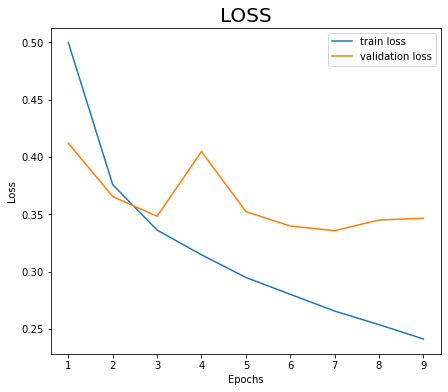

In [133]:
plt.figure(figsize=(7,6))
plt.plot(range(1, 9+1), hist.history['loss'], label='train loss')
plt.plot(range(1, 9+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#14번 에폭일때가 val_loss 제일 좋음

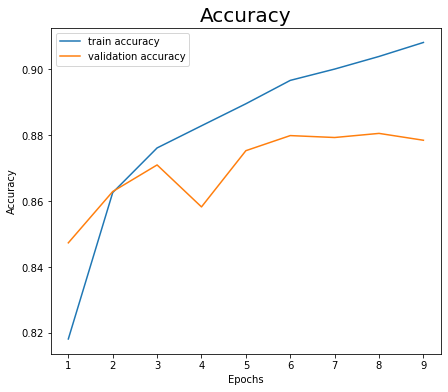

In [135]:
plt.figure(figsize=(7,6))
plt.plot(range(1, 9+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, 9+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#만약 맨 처음 돌렸을때 이런 양상을 띈다면 뒤에 더 학습해봐야 함.

In [ ]:
#########################################################################################33

##### 결과 시각화

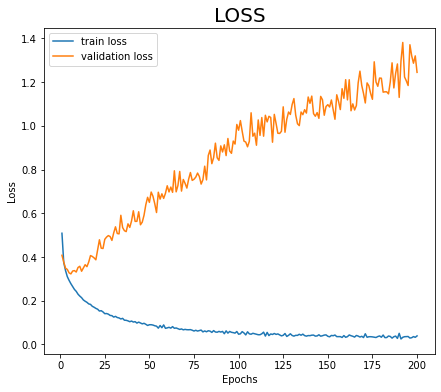

In [123]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#14번 에폭일때가 val_loss 제일 좋음

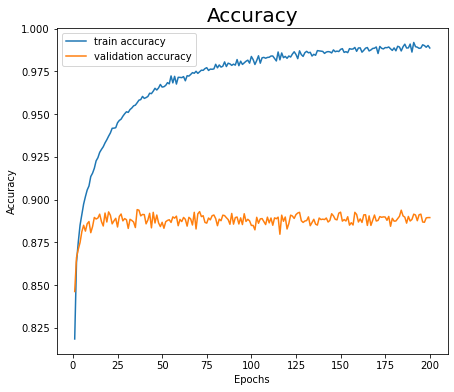

In [125]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#loss를 중심으로 보는게 나음

#### 최종평가

In [136]:
#88정도는 나쁘지 않음
loss, accuracy = model.evaluate(test_dataset)

313/313 [==============================] - 0s 625us/step - loss: 0.3780 - accuracy: 0.8707


In [137]:
print(loss, accuracy)

0.3780260980129242 0.8707000017166138


#### 새로운 데이터 추론

In [138]:
new_input = X_test[:5]

#새로운 데이터도 train할때와 동일한 형태로 만들어 줘야함
new_input = new_input/255.0 #grayscale

In [139]:
pred = model.predict(new_input)
print(pred.shape)
pred[0]
#0일확률~9일확률

(5, 10)


array([2.9442671e-08, 2.4728501e-09, 9.3739345e-09, 1.2964316e-09,
       8.5503320e-09, 1.3750661e-04, 4.7210997e-07, 5.0294853e-04,
       2.1783133e-07, 9.9935883e-01], dtype=float32)

In [143]:
pred[:,:4] #한 행을 기준으로 가장 높은 값 선택

array([[2.9442671e-08, 2.4728501e-09, 9.3739345e-09, 1.2964316e-09],
       [2.0684814e-05, 2.8426865e-09, 9.9869257e-01, 2.3385422e-07],
       [1.1295563e-10, 1.0000000e+00, 3.4379268e-12, 2.3430042e-09],
       [1.1190531e-09, 9.9999964e-01, 2.0704853e-11, 3.2390608e-07],
       [7.3224545e-02, 2.0145916e-07, 1.3660458e-02, 1.9569334e-04]],
      dtype=float32)

In [140]:
pred_class = np.argmax(pred, axis=-1) #마지막 축을 기준으로 체크
pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [141]:
test_label[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [142]:
class_names = np.array(class_names)
class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [145]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [146]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [148]:
X_train[:3]

array([[1.955e+01, 2.321e+01, 1.289e+02, 1.174e+03, 1.010e-01, 1.318e-01,
        1.856e-01, 1.021e-01, 1.989e-01, 5.884e-02, 6.107e-01, 2.836e+00,
        5.383e+00, 7.010e+01, 1.124e-02, 4.097e-02, 7.469e-02, 3.441e-02,
        2.768e-02, 6.240e-03, 2.082e+01, 3.044e+01, 1.420e+02, 1.313e+03,
        1.251e-01, 2.414e-01, 3.829e-01, 1.825e-01, 2.576e-01, 7.602e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, 5.859e+02, 8.817e-02, 6.718e-02,
        1.055e-02, 9.937e-03, 1.405e-01, 5.848e-02, 3.563e-01, 4.833e-01,
        2.235e+00, 2.934e+01, 6.432e-03, 1.156e-02, 7.741e-03, 5.657e-03,
        1.227e-02, 2.564e-03, 1.527e+01, 1.750e+01, 9.790e+01, 7.066e+02,
        1.072e-01, 1.071e-01, 3.517e-02, 3.312e-02, 1.859e-01, 6.810e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, 1.076e+03, 1.099e-01, 1.686e-01,
        1.974e-01, 1.009e-01, 1.907e-01, 6.049e-02, 6.289e-01, 6.633e-01,
        4.293e+00, 7.156e+01, 6.294e-03, 3.994e-02, 5.554e-02, 1.695e-02,
        2.428e-02, 3.535e-03, 2.282e

In [149]:
y_train[:3]

array([0, 1, 0])

#### 하이퍼파라미터, 변수 정의

In [151]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [152]:
#feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성

In [154]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [155]:
#이전것은 이미지라서 flatten 해야했음
X_train.shape #어차피 1차원이라서 flatten할 필요 없음

(364, 30)

#### model 생성, 컴파일

In [156]:
def create_wisconsin_model():
    #모델생성
    model = keras.Sequential()
    #히든레이어
    #데이터가 작아서 unit도 작게해줌
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    #출력레이어
    #이진분류:: 1일 확률을 출력하는 방식으로 구현
    #unit:1 activation 함수: sigmoid
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [157]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy', #이진분류 : 1의 확률을 출력하는 경우 (sigmoid 사용 시) 
              metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                992       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


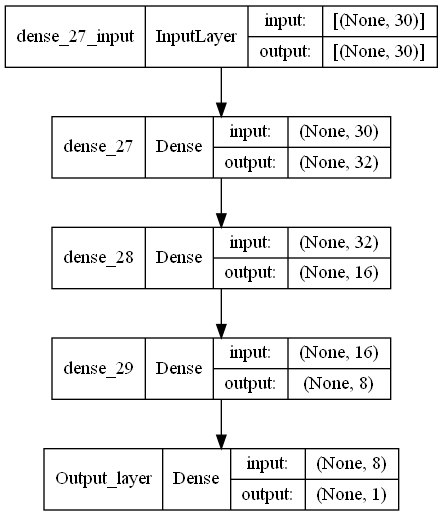

In [160]:
keras.utils.plot_model(model, show_shapes=True, to_file='cancer_model.png')

#### Train(학습)

In [161]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/150
7/7 [==============================] - 0s 11ms/step - loss: 0.6404 - accuracy: 0.7743 - val_loss: 0.6181 - val_accuracy: 0.8242
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.8771 - val_loss: 0.5652 - val_accuracy: 0.9121
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.9171 - val_loss: 0.5033 - val_accuracy: 0.9451
Epoch 4/150
7/7 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.9286 - val_loss: 0.4366 - val_accuracy: 0.9341
Epoch 5/150
7/7 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.9343 - val_loss: 0.3685 - val_accuracy: 0.9451
Epoch 6/150
7/7 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.9514 - val_loss: 0.3044 - val_accuracy: 0.9451
Epoch 7/150
7/7 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.9486 - val_loss: 0.2502 - val_accuracy: 0.9560
Epoch 8/150
7/7 [=========

7/7 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9890
Epoch 60/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9890
Epoch 61/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9890
Epoch 62/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9890
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 65/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9890
Epoch 66/150
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 118/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 119/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 120/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9890
Epoch 121/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 122/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9890
Epoch 123/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 124/150
7/7 [========

#### 결과 시각화

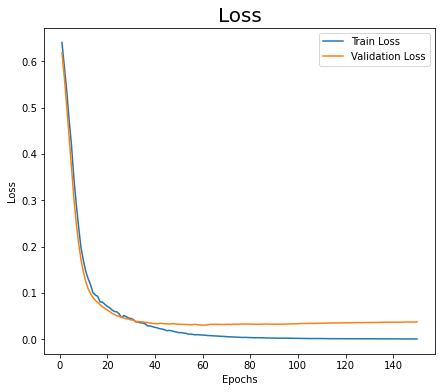

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

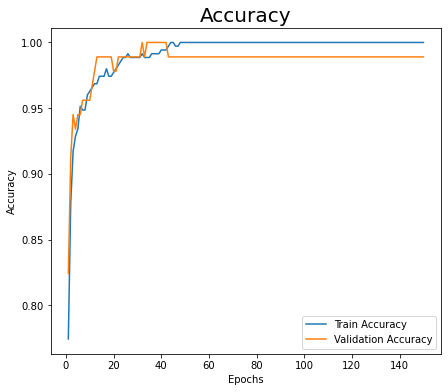

In [163]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [164]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 999us/step - loss: 0.2404 - accuracy: 0.9474


In [165]:
print(loss, acc)

0.24042800068855286 0.9473684430122375


#### 새로운 데이터 추론

In [166]:
new_data = X_test[:5]
#train set으로 학습한 scaler를 이용해 변환
new_data_scaled = scaler.transform(new_data)

In [167]:
pred = model.predict(new_data_scaled)

In [171]:
pred.shape

(5, 1)

In [172]:
pred

array([[2.1857457e-05],
       [1.2425139e-22],
       [1.3220028e-06],
       [9.9999917e-01],
       [5.0228130e-07]], dtype=float32)

In [176]:
#(pred > 0.5).astype('int') 아래와 동일한 결과
np.where(pred > 0.5, 1, 0)

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [169]:
result = (pred > 0.5).astype(np.int8)
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [170]:
result_label = np.where(pred>=0.5, "양성", "악성")
result_label

array([['악성'],
       ['악성'],
       ['악성'],
       ['양성'],
       ['악성']], dtype='<U2')

# Tensorflow 2.3이하 버전에서 Train dataset 구성 및 학습 
- 위의 코드들은 2.4 이후 버전
- 2.3 이하버전에서는 
    1. train_dataset 구성시 repeat()를 추가
    2. 학습시에 train/validation 1 epoch당 step 횟수를 추가
        - steps_per_epoch: train set 에 대한 step 횟수
        - validation_steps: validation set 에 대한 step 횟수

In [177]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()

val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [178]:
steps_per_epoch = len(train_dataset)
validation_steps = len(val_dataset)
print(steps_per_epoch, validation_steps)

7 2


In [179]:
model = create_wisconsin_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [180]:
#1에폭이 몇 스탭이다라고 알려줌 
model.fit(train_dataset2, 
          steps_per_epoch=steps_per_epoch, #train set:1 epoch당 step 수
          validation_data=val_dataset2,
          validation_steps=validation_steps, #val set:1 epoch당 step 수
          epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6826 - accuracy: 0.5657 - val_loss: 0.5989 - val_accuracy: 0.7802
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7971 - val_loss: 0.5296 - val_accuracy: 0.9341
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8943 - val_loss: 0.4717 - val_accuracy: 0.9560
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.9314 - val_loss: 0.4192 - val_accuracy: 0.9560
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4000 - accuracy: 0.9514 - val_loss: 0.3682 - val_accuracy: 0.9560
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.9543 - val_loss: 0.3189 - val_accuracy: 0.9670
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.9657 - val_loss: 0.2738 - val_accuracy: 0.9670
Epoch 8/10
7/7 [=================